In [1]:


import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import train_test_split as tts,RepeatedKFold ,cross_val_score ,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")



In [2]:
df= pd.read_csv(r"C:\Users\SURAJ\Downloads\Ridge_car_data.txt.csv")
df.dropna(inplace=True)
df.drop("car name",axis=1,inplace=True)
df.head()

,mpg,cylinders,displacement,weight,acceleration,model year,horsepower,origin
0,18.0,8,307.0,3504,12.0,70,130.0,1
1,15.0,8,350.0,3693,11.5,70,165.0,1
2,18.0,8,318.0,3436,11.0,70,150.0,1
3,16.0,8,304.0,3433,12.0,70,150.0,1
4,17.0,8,302.0,3449,10.5,70,140.0,1


In [3]:
ind = df[['mpg']]
dep = df.drop("mpg",axis=1)
X_train,X_test,y_train,y_test = tts(dep,ind,train_size=0.6,random_state=1)
print(X_test.shape)
print(X_train.shape)

(157, 7)
(235, 7)


In [4]:
Score = []
coeff = []
intercept = []
R_square = []
Adj_rsq =[]
MSE_train = []
MSE_test = []
alp_l1 =np.arange(-1,5)

for i in (alp_l1):
    model = ElasticNet(i)
    rd = model.fit(X_train,y_train)
    coeff.append(rd.coef_)
    intercept.append(rd.intercept_)
    R_square.append(r2_score(rd.predict(X_test),y_test))
    Adj_rsq.append(1 - (1 - np.mean(np.array(R_square)) * (len(X_test) - 1) / (len(X_test) - len(X_test.columns) - 1)))
    MSE_train.append(mean_squared_error(rd.predict(X_train),y_train))
    MSE_test.append(mean_squared_error(rd.predict(X_test),y_test))

In [5]:
int=pd.DataFrame(intercept)
int.columns = ["intercept"]
coeffs = pd.DataFrame(np.matrix(np.array(coeff)),columns=X_train.columns)
elastic = pd.DataFrame({
    "alpha" : alp_l1,
    "R_squre" : R_square,
    "Adj_rsquare" :Adj_rsq,
    "MSE_train" : MSE_train,
    "MSE_test" : MSE_test
    
})
elastic_data=pd.concat([elastic,int,coeffs],axis=1)
elastic_data

,alpha,R_squre,Adj_rsquare,MSE_train,MSE_test,intercept,cylinders,displacement,weight,acceleration,model year,horsepower,origin
0,-1,-0.004532,-0.004745,1.221129e+284,1.093918e+284,-5.253140e+142,5.026525e+141,-1.483418e+139,-4.585728e+137,6.820210e+140,-6.094868e+139,-1.325643e+139,1.584083e+142
1,0,0.762594,0.396838,1.051591e+01,1.196444e+01,-1.708097e+01,-8.463466e-02,1.225482e-02,-7.085130e-03,2.808207e-01,6.876652e-01,7.967903e-03,1.369471e+00
2,1,0.736367,0.521546,1.138373e+01,1.257338e+01,-4.404480e+00,0.000000e+00,-1.953816e-03,-6.428850e-03,3.697613e-02,6.135083e-01,-0.000000e+00,3.257848e-02
3,2,0.720467,0.579738,1.160871e+01,1.302165e+01,1.230177e+00,0.000000e+00,-4.037481e-03,-6.265026e-03,0.000000e+00,5.488663e-01,-1.822291e-03,0.000000e+00
4,3,0.704146,0.611236,1.182844e+01,1.349800e+01,5.752552e+00,0.000000e+00,-5.070542e-03,-6.195946e-03,0.000000e+00,4.898392e-01,-2.325141e-03,0.000000e+00
5,4,0.687262,0.629288,1.210265e+01,1.401094e+01,9.934670e+00,0.000000e+00,-6.017513e-03,-6.136909e-03,0.000000e+00,4.352821e-01,-2.687374e-03,0.000000e+00


Text(0.5, 1.0, 'Lambda V/c coefficeints')

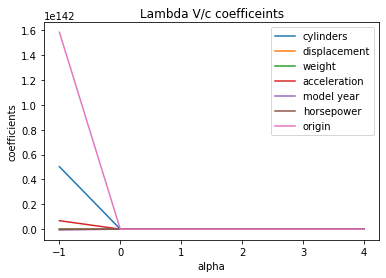

In [6]:
ax= plt.gca()
ax.plot(elastic_data["alpha"],coeffs,label = X_test.columns)
plt.legend()
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lambda V/c coefficeints')



Text(0.5, 1.0, 'Overfitting and Underfitting')

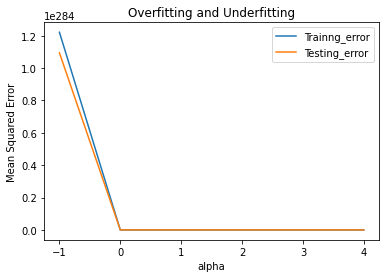

In [7]:


# overfit _ underfit 
plt.plot(elastic_data["alpha"],elastic_data.MSE_train,label="Trainng_error")
plt.plot(elastic_data["alpha"],elastic_data.MSE_test,label="Testing_error")
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('Overfitting and Underfitting')



In [8]:
from sklearn.linear_model import ElasticNetCV

In [9]:
mod = ElasticNetCV(cv=10,random_state=1).fit(X_train,y_train)
mod.alpha_

10.68616069171571

In [10]:
mod_ =ElasticNet(0.5).fit(X_train,y_train)

In [11]:
mod_.coef_

array([ 0.        ,  0.00218652, -0.00667188,  0.1327269 ,  0.6490387 ,
        0.0039964 ,  0.43658915])

In [12]:
mod_.intercept_

array([-9.71714586])